In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dpath = "/content/drive/MyDrive/bitamin_project/csv/"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 프레임 불러오기
df_맑은날 = pd.read_csv(dpath+'맑은날.csv')
df_여행 = pd.read_csv(dpath+'여행.csv')
df_화창한날 = pd.read_csv(dpath+'화창한날.csv')

df_미세먼지 = pd.read_csv(dpath+'미세먼지.csv')
df_안개 = pd.read_csv(dpath+'안개.csv')
df_흐린날 = pd.read_csv(dpath+'흐린날.csv')

df_눈오는날 = pd.read_csv(dpath+'눈오는날.csv')
df_크리스마스 = pd.read_csv(dpath+'크리스마스.csv')

df_비오는날 = pd.read_csv(dpath+'비오는날.csv')
df_여름비 = pd.read_csv(dpath+'여름비.csv')
df_장마 = pd.read_csv(dpath+'장마.csv')

df_일몰 = pd.read_csv(dpath+'일몰.csv')
df_일출 = pd.read_csv(dpath+'일출.csv')
df_저녁노을 = pd.read_csv(dpath+'저녁노을.csv')
df_노을 = pd.read_csv(dpath+'노을.csv')

In [ ]:
df_sunny = pd.concat([df_맑은날, df_여행, df_화창한날], ignore_index=True)
df_foggy = pd.concat([df_미세먼지, df_안개, df_흐린날], ignore_index=True)
df_snowy = pd.concat([df_눈오는날, df_크리스마스], ignore_index=True)
df_rainy = pd.concat([df_비오는날, df_여름비, df_장마], ignore_index=True)
df_sunrise_sunset = pd.concat([df_일몰, df_일출, df_저녁노을, df_노을], ignore_index=True)

In [ ]:
print(len(df_sunny), len(df_foggy), len(df_snowy), len(df_rainy), len(df_sunrise_sunset))

7326 6244 5984 7394 5512


In [ ]:
df_sunny['label'] = ['sunny']*len(df_sunny)
df_foggy['label'] = ['foggy']*len(df_foggy)
df_snowy['label'] = ['snowy']*len(df_snowy)
df_rainy['label'] = ['rainy']*len(df_rainy)
df_sunrise_sunset['label'] = ['sunrise_sunset']*len(df_sunrise_sunset)

In [ ]:
playlist = pd.concat([df_sunny, df_foggy, df_snowy, df_rainy, df_sunrise_sunset], ignore_index=True)
playlist.head(3)

,title,artist,likes,tag,specific_tag,image,file_name,label
0,pony,잔나비,14786,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",https://cdnimg.melon.co.kr/cm2/album/images/11...,pony_잔나비,sunny
1,한강에서 (Feat. BIG Naughty),폴킴,26767,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",https://cdnimg.melon.co.kr/cm2/album/images/11...,한강에서 (Feat. BIG Naughty)_폴킴,sunny
2,노래나 부를까,나상현씨밴드,1450,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",https://cdnimg.melon.co.kr/cm2/album/images/11...,노래나 부를까_나상현씨밴드,sunny


Label distribution:
rainy             7394
sunny             7326
foggy             6244
snowy             5984
sunrise_sunset    5512
Name: label, dtype: int64


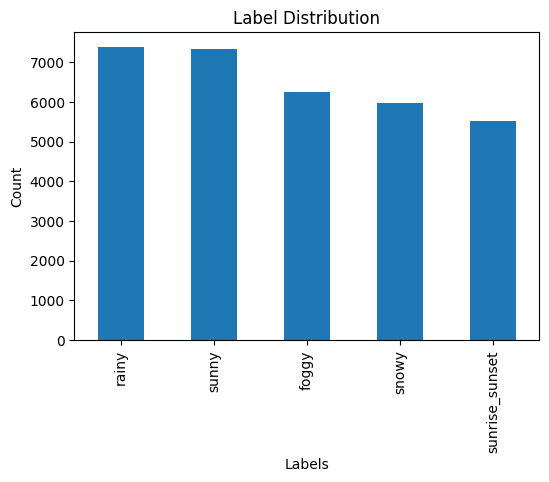

In [ ]:
# Summary statistics of the 'label' column
label_counts = playlist['label'].value_counts()
print("Label distribution:")
print(label_counts)

# Plot a bar chart for label distribution
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar')
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

In [ ]:
# Count of unique artists for each label
artist_per_label = playlist.groupby('label')['artist'].nunique()
print("Unique artists per label:")
print(artist_per_label)

Unique artists per label:
label
foggy             2926
rainy             2595
snowy             2078
sunny             2685
sunrise_sunset    2904
Name: artist, dtype: int64


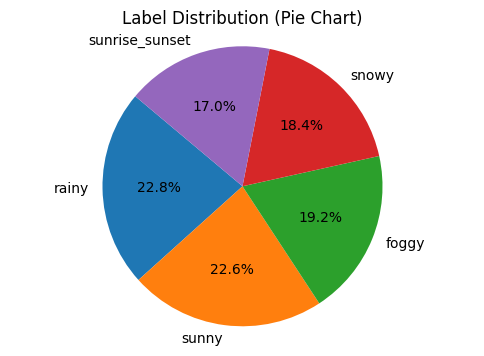

In [ ]:
# Plotting a pie chart for label distribution
plt.figure(figsize=(6, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title("Label Distribution (Pie Chart)")
plt.show()

In [ ]:
duplicate_rows = playlist[playlist.duplicated(subset=['title'])]
duplicate_rows.sort_values('title').head(3)

,title,artist,likes,tag,specific_tag,image,file_name,label
19337,'S Wonderful,Coleman Hawkins,21,크리스마스,"['재즈', '재즈팝', '올드팝', 'Jazz', '크리스마스', '콘토', '겨...",https://cdnimg.melon.co.kr/cm2/album/images/05...,'S Wonderful_Coleman Hawkins,snowy
222,'S Wonderful,"Tony Bennett, Diana Krall",552,맑은날,"['데이트', '행복', '사랑', '연인', '맑은날', '달콤', '재즈', '...",https://cdnimg.melon.co.kr/cm/album/images/102...,"'S Wonderful_Tony Bennett, Diana Krall",sunny
494,'S Wonderful,Diana Krall,85,맑은날,"['화사한', '휴식', '재즈', '일상', '밝은날', '맑은날', '화려한',...",https://cdnimg.melon.co.kr/cm/album/images/003...,'S Wonderful_Diana Krall,sunny


In [ ]:
unique_pl = playlist[['title','artist', 'label']].value_counts().to_frame(name='number')
unique_pl.head()

,,,number
title,artist,label,
비도 오고 그래서 (Feat. 신용재),헤이즈 (Heize),rainy,47
Rain,태연 (TAEYEON),rainy,46
우산 (Feat. 윤하),에픽하이 (EPIK HIGH),rainy,41
비,폴킴,rainy,40
소나기,아이오아이 (I.O.I),rainy,37


In [ ]:
unique_pl.reset_index(inplace=True)
print(len(unique_pl))
unique_pl.head(3)

22661


,title,artist,label,number
0,비도 오고 그래서 (Feat. 신용재),헤이즈 (Heize),rainy,47
1,Rain,태연 (TAEYEON),rainy,46
2,우산 (Feat. 윤하),에픽하이 (EPIK HIGH),rainy,41


In [ ]:
df = pd.merge(playlist, unique_pl, on=['title', 'artist','label'])
df.head(3)

,title,artist,likes,tag,specific_tag,image,file_name,label,number
0,pony,잔나비,14786,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",https://cdnimg.melon.co.kr/cm2/album/images/11...,pony_잔나비,sunny,2
1,pony,잔나비,14788,여행,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",https://cdnimg.melon.co.kr/cm2/album/images/11...,pony_잔나비,sunny,2
2,한강에서 (Feat. BIG Naughty),폴킴,26767,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",https://cdnimg.melon.co.kr/cm2/album/images/11...,한강에서 (Feat. BIG Naughty)_폴킴,sunny,5


In [ ]:
# 각 label별 likes가 최대인 노래 출력
df.loc[df.groupby('label')['likes'].idxmax(), ['label', 'title', 'artist', 'likes', 'tag', 'number']]

,label,title,artist,likes,tag,number
8502,foggy,봄날,방탄소년단,550219,미세먼지,4
19740,rainy,밤편지,아이유,461361,비오는날,16
13999,snowy,밤편지,아이유,461355,눈오는날,2
526,sunny,봄날,방탄소년단,550222,맑은날,2
27800,sunrise_sunset,밤편지,아이유,461367,저녁노을,1


### 위에서 본 것처럼 단순히 좋아요수에 따라 뽑으면 인기있는 가수의 노래만 선별됨.

그 specific_tag로 각 label을 잘 대표하는지 반영하는 파생변수 + number + likes 를 모두 고려한 변수를 고안

In [ ]:
# 각 label별 number가 최대인 노래 출력(각 label별 중복이 가장 많은 노래)
df.loc[df.groupby('label')['number'].idxmax(), ['label', 'title', 'artist', 'likes', 'number']]

,label,title,artist,likes,number
7755,foggy,이제는 안녕,Mono Tape,1414,14
19802,rainy,비도 오고 그래서 (Feat. 신용재),헤이즈 (Heize),313414,47
14188,snowy,All I Want for Christmas Is You,Mariah Carey,217728,34
1786,sunny,차와 이야기를 나눠요,레피 (repi),20,26
27226,sunrise_sunset,EVERYTHING,검정치마,143645,6


In [ ]:
df[df['title']=='밤편지'].head()

,title,artist,likes,tag,specific_tag,image,file_name,label,number
1223,밤편지,아이유,461364,맑은날,"['기타', '가을', '목소리', '감성', '어쿠스틱', '비온뒤', '맑은날'...",https://cdnimg.melon.co.kr/cm/album/images/100...,밤편지_아이유,sunny,2
1224,밤편지,아이유,461365,화창한날,"['케이윌', '리수', '수지', '아이유', '빗소리를들으며', '새벽공기를마시...",https://cdnimg.melon.co.kr/cm/album/images/100...,밤편지_아이유,sunny,2
9670,밤편지,아이유,461366,미세먼지,"['가을밤', '밤에듣기좋은노래', '새벽', '밤', '잠들기전', '회상', '...",https://cdnimg.melon.co.kr/cm/album/images/100...,밤편지_아이유,foggy,3
9671,밤편지,아이유,461364,안개,"['감성적인', '새벽', '첫사랑', '짝사랑', '몽환적인', '사랑', '환상...",https://cdnimg.melon.co.kr/cm/album/images/100...,밤편지_아이유,foggy,3
9672,밤편지,아이유,461368,흐린날,"['새벽', '위로', '센치한', '감성', '휴식', '기분전환', '힐링', ...",https://cdnimg.melon.co.kr/cm/album/images/100...,밤편지_아이유,foggy,3


### 위에서 본 것처럼 같은 노래인데 좋아요 수가 다름 -> 크롤링 하는 순간에도 좋아요 수가 변하기 때문. -> 통일 완료

In [ ]:
df_likes_max = df.groupby(['title', 'artist'])['likes'].max().to_frame().reset_index()
df_likes_max

,title,artist,likes
0,! (느낌표),오늘 (Today),907
1,"""Méditation"" from Thaïs",Joshua Bell,7
2,#LoveSTAY,Stray Kids (스트레이 키즈),6837
3,#menow,프로미스나인,15670
4,#봄,꽃가람,13
...,...,...,...
18787,흰눈 사이로 하이힐 타고,"오렌지 캬라멜, 뉴이스트",11836
18788,히어로,LUCY,39614
18789,히터 (feat. 정인),베이빌론 (Babylon),298
18790,힐링,세븐틴 (SEVENTEEN),59967


In [ ]:
merged_df = df.merge(df_likes_max, on=['title', 'artist'], suffixes=('_orginal', '_max'))
merged_df.head(3)

,title,artist,likes_orginal,tag,specific_tag,image,file_name,label,number,likes_max
0,pony,잔나비,14786,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",https://cdnimg.melon.co.kr/cm2/album/images/11...,pony_잔나비,sunny,2,14800
1,pony,잔나비,14788,여행,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",https://cdnimg.melon.co.kr/cm2/album/images/11...,pony_잔나비,sunny,2,14800
2,pony,잔나비,14795,비오는날,"['봄', '카페', '잔잔한', '기분좋은', '감성', '비오는날', '이별',...",https://cdnimg.melon.co.kr/cm2/album/images/11...,pony_잔나비,rainy,1,14800


In [ ]:
# 같은 노래면 좋아요수 가장 높은 값으로 통일
df = merged_df.drop('likes_orginal', axis=1)
df.rename(columns={'likes_max': 'likes'}, inplace=True)
print(len(df))
df.head()

32460


,title,artist,tag,specific_tag,image,file_name,label,number,likes
0,pony,잔나비,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",https://cdnimg.melon.co.kr/cm2/album/images/11...,pony_잔나비,sunny,2,14800
1,pony,잔나비,여행,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",https://cdnimg.melon.co.kr/cm2/album/images/11...,pony_잔나비,sunny,2,14800
2,pony,잔나비,비오는날,"['봄', '카페', '잔잔한', '기분좋은', '감성', '비오는날', '이별',...",https://cdnimg.melon.co.kr/cm2/album/images/11...,pony_잔나비,rainy,1,14800
3,pony,잔나비,노을,"['퇴근길', '감성', '위로', '버스', '지하철', '저녁', '노을', '...",https://cdnimg.melon.co.kr/cm2/album/images/11...,pony_잔나비,sunrise_sunset,1,14800
4,한강에서 (Feat. BIG Naughty),폴킴,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",https://cdnimg.melon.co.kr/cm2/album/images/11...,한강에서 (Feat. BIG Naughty)_폴킴,sunny,5,26803


In [ ]:
# 데이터 프레임 저장
df.to_csv(dpath+'playlist_melon.csv', encoding='utf-8-sig',index=False) # dpath = "/content/drive/MyDrive/bitamin_project/csv/"

In [ ]:
path = "/content/drive/MyDrive/bitamin_project/output/"

In [ ]:
def remove_duplicate(lst):
  no_duplicate = []
  for i in lst:
    plus = 1
    no_duplicate.append(i)
    while plus < i:
      lst.remove(lst[i+plus-1])
      plus += 1
  return no_duplicate

In [ ]:
def special_tag(df):
  total = []
  small = []
  numlist = df['number'].tolist()
  taglist = df['specific_tag'].tolist()
  titlelist = df['title'].tolist()
  artistlist = df['artist'].tolist()
  labellist = df['label'].tolist()

  for i in range(len(df)-1):
    if titlelist[i] == titlelist[i+1] and artistlist[i] == artistlist[i+1] and labellist[i] == labellist[i+1]:
      for k in taglist[i]:
        if k in small:
          continue
        else:
          small.append(k)
    else:
      for k in taglist[i]:
        if k in small:
          continue
        else:
          small.append(k)
      total.append(small)
      small = []

  num1 = numlist[-1]
  for j in range(num1):
    for k in taglist[-j-1]:
        if k in small:
          continue
        else:
          small.append(k)

  total.append(small)
  return total

In [ ]:
def preprocessing(df):
  # 문자열에서 리스트로 변환
  for i in range(len(df)):
    df['specific_tag'][i] = eval(df['specific_tag'][i])

  #number가 1과 1이 아닌 것 구분
  df_1 = df[df['number']==1]
  df_1.drop('tag', axis=1, inplace=True)
  df_2 = df[df['number']!=1]
  df_2.drop('tag', axis=1, inplace=True)

  #number와 title, label로 정렬, 중복 제거된 데이터와 순서가 같아야 함.
  df_2 = df_2.sort_values(by=['number', 'title'])
  unique_pl = df_2[['title','artist', 'label']].value_counts().to_frame(name='number')
  unique_pl = unique_pl.sort_values(by=['number', 'title'])

  #special tag가 합쳐진 리스트 뽑기
  special_taglist = special_tag(df_2)

  #likes 수 중복되지 않게 리스트 만들기
  numlist = df_2['number'].tolist()
  rem_dup_list = remove_duplicate(numlist)
  likelist = df_2['likes'].tolist()
  rem_dup_likelist = []
  plus = 0
  for i in rem_dup_list:
    rem_dup_likelist.append(likelist[plus])
    plus += i

  # unique_pl에 special_tag, likes 붙이기
  unique_pl.reset_index(inplace=True)
  unique_pl['likes'] = rem_dup_likelist
  unique_pl['specific_tag'] = special_taglist
  # 변수 순서 바꿔주기
  unique_pl = unique_pl[['title', 'artist', 'specific_tag', 'label', 'number', 'likes']]

  df_3 = pd.concat([df_1, unique_pl], ignore_index = True)
  return df_3